In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , RepeatedStratifiedKFold , GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report , ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score
import torch
from torch import nn
from torch.utils.data import TensorDataset , DataLoader
from statistics import mean

## Balancing data and saving it in another file

In [ ]:
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
data=pd.read_csv('magic04.data',names=columns)

In [ ]:
i=5644
while i>0:
    j=random.randint(0,12331)
    if data.iloc[j,10]=='g':
        data=data.drop(data.index[j])
        i-=1
data=data.reset_index(drop=True)

In [ ]:
data.to_csv('modified_magic.csv',index=False)

## Begin

In [2]:
data=pd.read_csv('/content/sample_data/modified_magic.csv')

In [3]:
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
13371,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
13372,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
13373,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
13374,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
data['class'].value_counts()

g    6688
h    6688
Name: class, dtype: int64

In [5]:
X = data.drop(columns = ['class']).copy()
y = data['class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,stratify=y)

In [7]:
train_data=pd.concat([X_train,pd.DataFrame(y_train)],axis=1)
test_data=pd.concat([X_test,pd.DataFrame(y_test)],axis=1)

In [8]:
train_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
11979,21.4374,9.7783,2.2304,0.6353,0.3324,22.3045,18.1132,-11.1708,35.3391,229.7000,h
12753,140.6142,104.4255,3.8789,0.0583,0.0390,-22.6560,59.7584,-55.2579,85.1154,295.2699,h
10679,168.6169,95.4345,3.6384,0.1288,0.0565,-165.1025,-62.3979,-87.2004,31.7599,185.7593,h
5405,113.9130,23.3338,3.0699,0.1890,0.1052,101.6200,110.1700,17.0380,10.8666,284.7470,g
10628,22.1815,7.3637,2.4922,0.7970,0.4865,4.3987,-9.5286,-7.9688,82.0983,240.7557,h
...,...,...,...,...,...,...,...,...,...,...,...
1268,20.1638,12.7267,2.4448,0.4452,0.2316,-19.1572,-6.4733,6.7455,11.6550,188.7000,g
5582,48.3689,21.4332,3.1074,0.2351,0.1339,54.2967,-23.6248,14.5762,6.6160,184.4000,g
12173,57.2899,11.9934,2.9506,0.2476,0.1350,-37.6898,45.8293,-9.8456,37.1283,154.4390,h
11079,31.1667,9.0403,2.3646,0.5054,0.2959,32.7075,26.0651,-10.6431,66.5470,242.7630,h


In [9]:
test_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
754,66.0687,20.3533,2.9643,0.2823,0.1493,-50.6715,-43.5782,-12.3356,5.3690,280.9980,g
6398,69.1158,20.1654,3.0461,0.2392,0.1245,24.6108,56.1297,13.4596,0.2060,264.5620,g
12358,106.9500,91.6046,3.6199,0.1982,0.1136,-181.1410,87.7473,-73.5722,75.5990,428.4090,h
10596,52.9512,18.4642,2.8982,0.2402,0.1321,-11.5361,36.6526,10.5417,15.7762,243.8490,h
8670,81.3168,29.5452,3.0731,0.2317,0.1304,-109.3272,57.2042,36.8897,15.8253,315.2557,h
...,...,...,...,...,...,...,...,...,...,...,...
6314,54.8714,21.7920,3.0191,0.2957,0.1641,6.9911,40.3780,-15.3335,0.6510,245.1110,g
7787,27.7999,17.5546,2.8014,0.3692,0.2107,6.9422,0.5586,-17.8538,30.5830,200.5103,h
7711,81.2405,18.0776,2.7189,0.3443,0.1663,20.1752,64.6191,-8.3390,85.4906,40.1528,h
13053,35.8431,31.3650,2.7312,0.3608,0.1811,-30.9958,-27.5521,-18.0018,12.2384,101.1014,h


In [10]:
train_data['class'].value_counts()

h    4682
g    4681
Name: class, dtype: int64

In [11]:
test_data['class'].value_counts()

g    2007
h    2006
Name: class, dtype: int64

In [12]:
temp = train_data[train_data['class'] == 'h']
rows = np.random.choice(temp.index.values, 1)
sampled_df = train_data.loc[rows]
sampled_df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
10473,71.7611,20.1438,2.8363,0.5026,0.3197,-87.9786,-47.0656,-14.9389,48.4428,288.6459,h


In [13]:
x=sampled_df.index.values[0]
x

10473

In [14]:
train_data=train_data.drop(x)

In [15]:
train_data['class'].value_counts()

h    4681
g    4681
Name: class, dtype: int64

In [16]:
test_data=pd.concat([test_data,sampled_df],axis=0)

In [17]:
test_data['class'].value_counts()

g    2007
h    2007
Name: class, dtype: int64

In [18]:
train_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
11979,21.4374,9.7783,2.2304,0.6353,0.3324,22.3045,18.1132,-11.1708,35.3391,229.7000,h
12753,140.6142,104.4255,3.8789,0.0583,0.0390,-22.6560,59.7584,-55.2579,85.1154,295.2699,h
10679,168.6169,95.4345,3.6384,0.1288,0.0565,-165.1025,-62.3979,-87.2004,31.7599,185.7593,h
5405,113.9130,23.3338,3.0699,0.1890,0.1052,101.6200,110.1700,17.0380,10.8666,284.7470,g
10628,22.1815,7.3637,2.4922,0.7970,0.4865,4.3987,-9.5286,-7.9688,82.0983,240.7557,h
...,...,...,...,...,...,...,...,...,...,...,...
1268,20.1638,12.7267,2.4448,0.4452,0.2316,-19.1572,-6.4733,6.7455,11.6550,188.7000,g
5582,48.3689,21.4332,3.1074,0.2351,0.1339,54.2967,-23.6248,14.5762,6.6160,184.4000,g
12173,57.2899,11.9934,2.9506,0.2476,0.1350,-37.6898,45.8293,-9.8456,37.1283,154.4390,h
11079,31.1667,9.0403,2.3646,0.5054,0.2959,32.7075,26.0651,-10.6431,66.5470,242.7630,h


In [19]:
test_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
754,66.0687,20.3533,2.9643,0.2823,0.1493,-50.6715,-43.5782,-12.3356,5.3690,280.9980,g
6398,69.1158,20.1654,3.0461,0.2392,0.1245,24.6108,56.1297,13.4596,0.2060,264.5620,g
12358,106.9500,91.6046,3.6199,0.1982,0.1136,-181.1410,87.7473,-73.5722,75.5990,428.4090,h
10596,52.9512,18.4642,2.8982,0.2402,0.1321,-11.5361,36.6526,10.5417,15.7762,243.8490,h
8670,81.3168,29.5452,3.0731,0.2317,0.1304,-109.3272,57.2042,36.8897,15.8253,315.2557,h
...,...,...,...,...,...,...,...,...,...,...,...
7787,27.7999,17.5546,2.8014,0.3692,0.2107,6.9422,0.5586,-17.8538,30.5830,200.5103,h
7711,81.2405,18.0776,2.7189,0.3443,0.1663,20.1752,64.6191,-8.3390,85.4906,40.1528,h
13053,35.8431,31.3650,2.7312,0.3608,0.1811,-30.9958,-27.5521,-18.0018,12.2384,101.1014,h
390,27.1388,21.2758,2.8156,0.3379,0.1766,-10.7681,23.5939,21.1059,30.8250,117.5400,g


In [20]:
X_train = train_data.drop(columns = ['class']).copy()
y_train = train_data['class']
X_test = test_data.drop(columns = ['class']).copy()
y_test = test_data['class']

## We are sure that data is balanced in train test split

## KNN

#### Cross validation is done for tuning the hyperparameter n_neigbours. First we will find the accuracy of our model using cross validation score on Ks from 1 to 100 with step 10 , this is to choose a suitable range to make grid search on this range

In [21]:
k_range=range(1,150,10)
k_scores=[]
skf = StratifiedKFold(n_splits=10)
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=skf,scoring='accuracy')
    k_scores.append(scores.mean())
    print("At k= "+str(k)+" mean score for 10 folds is "+str(scores.mean()))

At k= 1 mean score for 10 folds is 0.7419332475895976
At k= 11 mean score for 10 folds is 0.7734444125185854
At k= 21 mean score for 10 folds is 0.7741942141221758
At k= 31 mean score for 10 folds is 0.7703485163597223
At k= 41 mean score for 10 folds is 0.7725919920823869
At k= 51 mean score for 10 folds is 0.7709894279798228
At k= 61 mean score for 10 folds is 0.7666097702250319
At k= 71 mean score for 10 folds is 0.7645801977578927
At k= 81 mean score for 10 folds is 0.7629778616971786
At k= 91 mean score for 10 folds is 0.761162420527415
At k= 101 mean score for 10 folds is 0.7591335321858266
At k= 111 mean score for 10 folds is 0.7577443012341625
At k= 121 mean score for 10 folds is 0.7566754690820858
At k= 131 mean score for 10 folds is 0.7557148427879483
At k= 141 mean score for 10 folds is 0.7556075490974103


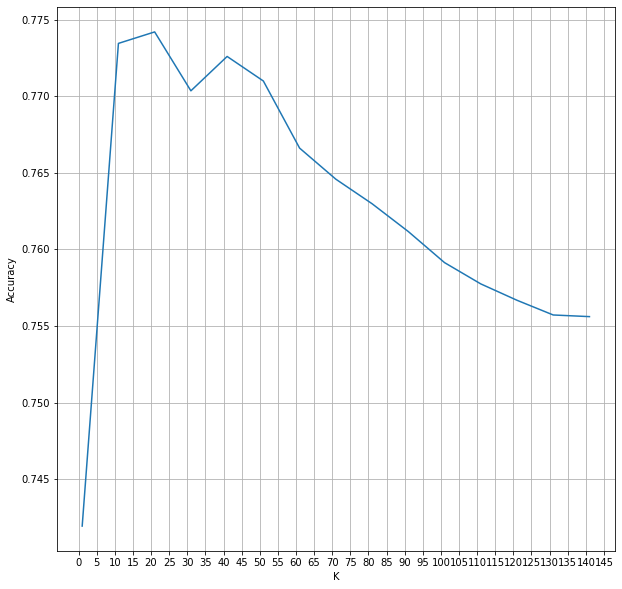

In [22]:
plt.figure(figsize=(10,10))
sns.lineplot(x=k_range,y=k_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(0,150,5))
plt.grid()

#### It is noticed that the heigest range for accuracy is between k=10 and k=45 , so we will make grid search on this range

In [23]:
knn_params={
    "n_neighbors":range(10,45)
}
knn=KNeighborsClassifier()
grid_search=GridSearchCV(estimator=knn,param_grid=knn_params,cv=10,scoring='accuracy')
grid_result=grid_search.fit(X_train,y_train)

#### From sklearn concerning cv parameter : For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used

In [24]:
print(grid_result.best_params_)

{'n_neighbors': 13}


In [25]:
grid_result.best_params_['n_neighbors']

13

In [26]:
knn_best=KNeighborsClassifier(n_neighbors=grid_result.best_params_['n_neighbors'])
scores_best=cross_val_score(knn_best,X_train,y_train,cv=10,scoring='accuracy')
print("Mean accuracy for k="+str(grid_result.best_params_["n_neighbors"])+" equals "+str(scores_best.mean()))

Mean accuracy for k=13 equals 0.7745140428171379


In [27]:
final_knn=KNeighborsClassifier(n_neighbors=grid_result.best_params_['n_neighbors'])
final_knn.fit(X_train,y_train)
y_pred=final_knn.predict(X_test)
print("Classification report for KNN\n======================================")
print(classification_report(y_test,y_pred))
cm_knn=confusion_matrix(y_test,y_pred)
print(grid_result.best_params_)

Classification report for KNN
              precision    recall  f1-score   support

           g       0.73      0.86      0.79      2007
           h       0.83      0.68      0.75      2007

    accuracy                           0.77      4014
   macro avg       0.78      0.77      0.77      4014
weighted avg       0.78      0.77      0.77      4014

{'n_neighbors': 13}


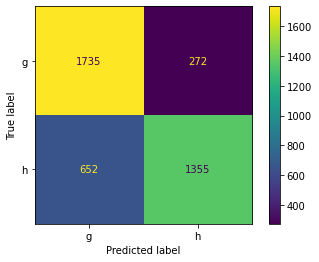

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=final_knn.classes_)
disp.plot()

In [29]:
cm_knn=cm_knn.tolist()

In [30]:
cm_knn

[[1735, 272], [652, 1355]]

In [31]:
def sens_and_spec(TG,TH,FH,FG):
  sens=(TG)/(TG+FH)
  spec=(TH)/(TH+FG)
  return sens , spec

In [32]:
knn_sens , knn_spec = sens_and_spec(cm_knn[0][0],cm_knn[1][1],cm_knn[0][1],cm_knn[1][0])
print("KNN sensitivity is "+str(knn_sens))
print("KNN speceficity is "+str(knn_spec))

KNN sensitivity is 0.8644743398106627
KNN speceficity is 0.6751370204285002


## Random Forest

In [33]:
n_range=range(10,500,20)
n_scores=[]
skf = StratifiedKFold(n_splits=10)
for n in n_range:
    rfc=RandomForestClassifier(n_estimators=n)
    nscores=cross_val_score(rfc,X_train,y_train,cv=skf,scoring='accuracy')
    n_scores.append(nscores.mean())
    print("At n= "+str(n)+" mean score for 10 folds is "+str(nscores.mean()))

At n= 10 mean score for 10 folds is 0.8446908436636292
At n= 30 mean score for 10 folds is 0.8586823513851263
At n= 50 mean score for 10 folds is 0.8574015543332513
At n= 70 mean score for 10 folds is 0.8631712411861827
At n= 90 mean score for 10 folds is 0.8618879356739549
At n= 110 mean score for 10 folds is 0.8610343750285052
At n= 130 mean score for 10 folds is 0.8597517536418284
At n= 150 mean score for 10 folds is 0.8599659989601293
At n= 170 mean score for 10 folds is 0.8618883917576554
At n= 190 mean score for 10 folds is 0.8626359129427431
At n= 210 mean score for 10 folds is 0.8635977934670571
At n= 230 mean score for 10 folds is 0.8609277654635179
At n= 250 mean score for 10 folds is 0.8618882777367303
At n= 270 mean score for 10 folds is 0.8628490180517929
At n= 290 mean score for 10 folds is 0.8643448585684446
At n= 310 mean score for 10 folds is 0.8640248018316321
At n= 330 mean score for 10 folds is 0.8627433206542066
At n= 350 mean score for 10 folds is 0.86263671108921

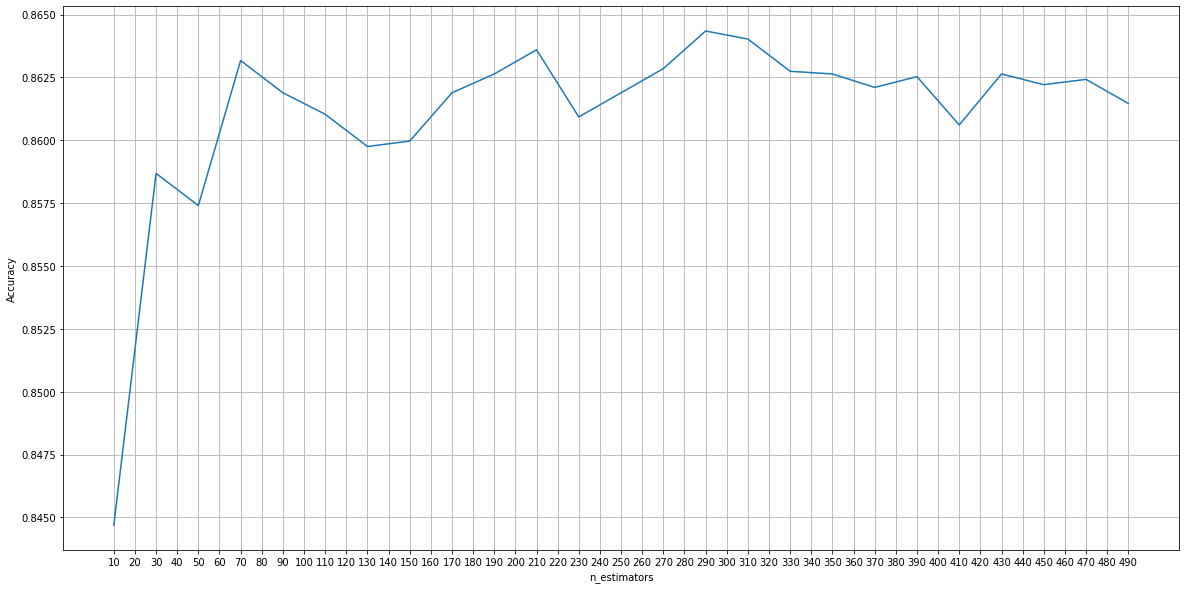

In [34]:
plt.figure(figsize=(20,10))
sns.lineplot(x=n_range,y=n_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(10,500,10))
plt.grid()

#### it is noticed that it oscilates between 70 and 210 , so do a search again on this range before grid search

In [35]:
n_range_repeated=range(70,210,30)
n_scores_repeated=[]
skf = StratifiedKFold(n_splits=10)
for n in n_range_repeated:
    rfc=RandomForestClassifier(n_estimators=n)
    nscores_repeated=cross_val_score(rfc,X_train,y_train,cv=skf,scoring='accuracy')
    n_scores_repeated.append(nscores_repeated.mean())
    print("At n= "+str(n)+" mean score for 10 folds is "+str(nscores_repeated.mean()))

At n= 70 mean score for 10 folds is 0.8616749445858304
At n= 100 mean score for 10 folds is 0.8592176796285657
At n= 130 mean score for 10 folds is 0.8602858276550911
At n= 160 mean score for 10 folds is 0.8624226938127686
At n= 190 mean score for 10 folds is 0.8637047450948199


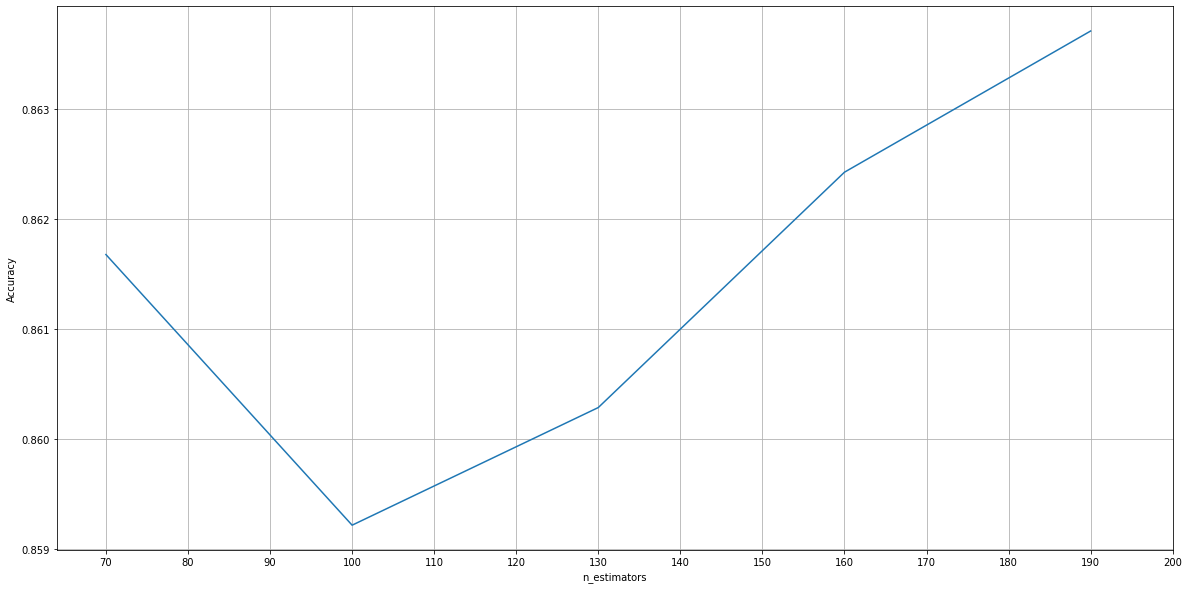

In [36]:
plt.figure(figsize=(20,10))
sns.lineplot(x=n_range_repeated,y=n_scores_repeated)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(70,210,10))
plt.grid()

In [37]:
rfc_params={
    "n_estimators":range(170,240,5)
}
rfc=RandomForestClassifier()
grid_search_rfc=GridSearchCV(estimator=rfc,param_grid=rfc_params,cv=10,scoring='accuracy')
grid_result_rfc=grid_search_rfc.fit(X_train,y_train)

In [38]:
print(grid_result_rfc.best_params_)

{'n_estimators': 175}


In [39]:
rfc_best=RandomForestClassifier(n_estimators=grid_result_rfc.best_params_["n_estimators"])
scores_best_rfc=cross_val_score(rfc_best,X_train,y_train,cv=10,scoring='accuracy')
print("Mean accuracy for n= "+str(grid_result_rfc.best_params_["n_estimators"])+" equals "+str(scores_best_rfc.mean()))

Mean accuracy for n= 175 equals 0.8627432066332814


In [40]:
final_rfc=RandomForestClassifier(n_estimators=grid_result_rfc.best_params_["n_estimators"])
final_rfc.fit(X_train,y_train)
y_pred_rfc=final_rfc.predict(X_test)
print("Random Forest classification report\n====================================")
print(classification_report(y_test,y_pred_rfc))
cm_rfc=confusion_matrix(y_test,y_pred_rfc)
print(grid_result_rfc.best_params_)

Random Forest classification report
              precision    recall  f1-score   support

           g       0.84      0.89      0.87      2007
           h       0.89      0.83      0.86      2007

    accuracy                           0.86      4014
   macro avg       0.86      0.86      0.86      4014
weighted avg       0.86      0.86      0.86      4014

{'n_estimators': 175}


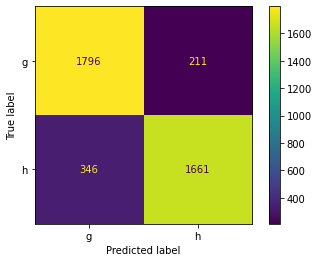

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc,display_labels=final_rfc.classes_)
disp.plot()

In [42]:
cm_rfc=confusion_matrix(y_test,y_pred_rfc)
cm_rfc=cm_rfc.tolist()
cm_rfc

[[1796, 211], [346, 1661]]

In [43]:
rfc_sens , rfc_spec = sens_and_spec(cm_rfc[0][0],cm_rfc[1][1],cm_rfc[0][1],cm_rfc[1][0])
print("RFC sensitivity is "+str(rfc_sens))
print("RFC speceficity is "+str(rfc_spec))

RFC sensitivity is 0.8948679621325362
RFC speceficity is 0.8276033881415047


## AdaBoost

In [44]:
n_range_ada=range(1,500,20)
n_scores_ada=[]
skf = StratifiedKFold(n_splits=10)
for n in n_range_ada:
    adac=AdaBoostClassifier(n_estimators=n)
    nscores_ada=cross_val_score(adac,X_train,y_train,cv=skf,scoring='accuracy')
    n_scores_ada.append(nscores_ada.mean())
    print("At n= "+str(n)+" mean score for 10 folds is "+str(nscores_ada.mean()))

At n= 1 mean score for 10 folds is 0.7278370686588402
At n= 21 mean score for 10 folds is 0.7953449817110437
At n= 41 mean score for 10 folds is 0.8132898229483073
At n= 61 mean score for 10 folds is 0.8176691386403233
At n= 81 mean score for 10 folds is 0.8192709045964115
At n= 101 mean score for 10 folds is 0.8193784263287999
At n= 121 mean score for 10 folds is 0.8211939815194883
At n= 141 mean score for 10 folds is 0.8210871439126508
At n= 161 mean score for 10 folds is 0.8223689671528518
At n= 181 mean score for 10 folds is 0.82375717191619
At n= 201 mean score for 10 folds is 0.823329365405139
At n= 221 mean score for 10 folds is 0.8247176841894024
At n= 241 mean score for 10 folds is 0.824076886590227
At n= 261 mean score for 10 folds is 0.823435518886426
At n= 281 mean score for 10 folds is 0.8231153481286885
At n= 301 mean score for 10 folds is 0.8226877696594878
At n= 321 mean score for 10 folds is 0.8233286812795884
At n= 341 mean score for 10 folds is 0.8230079404172252
At 

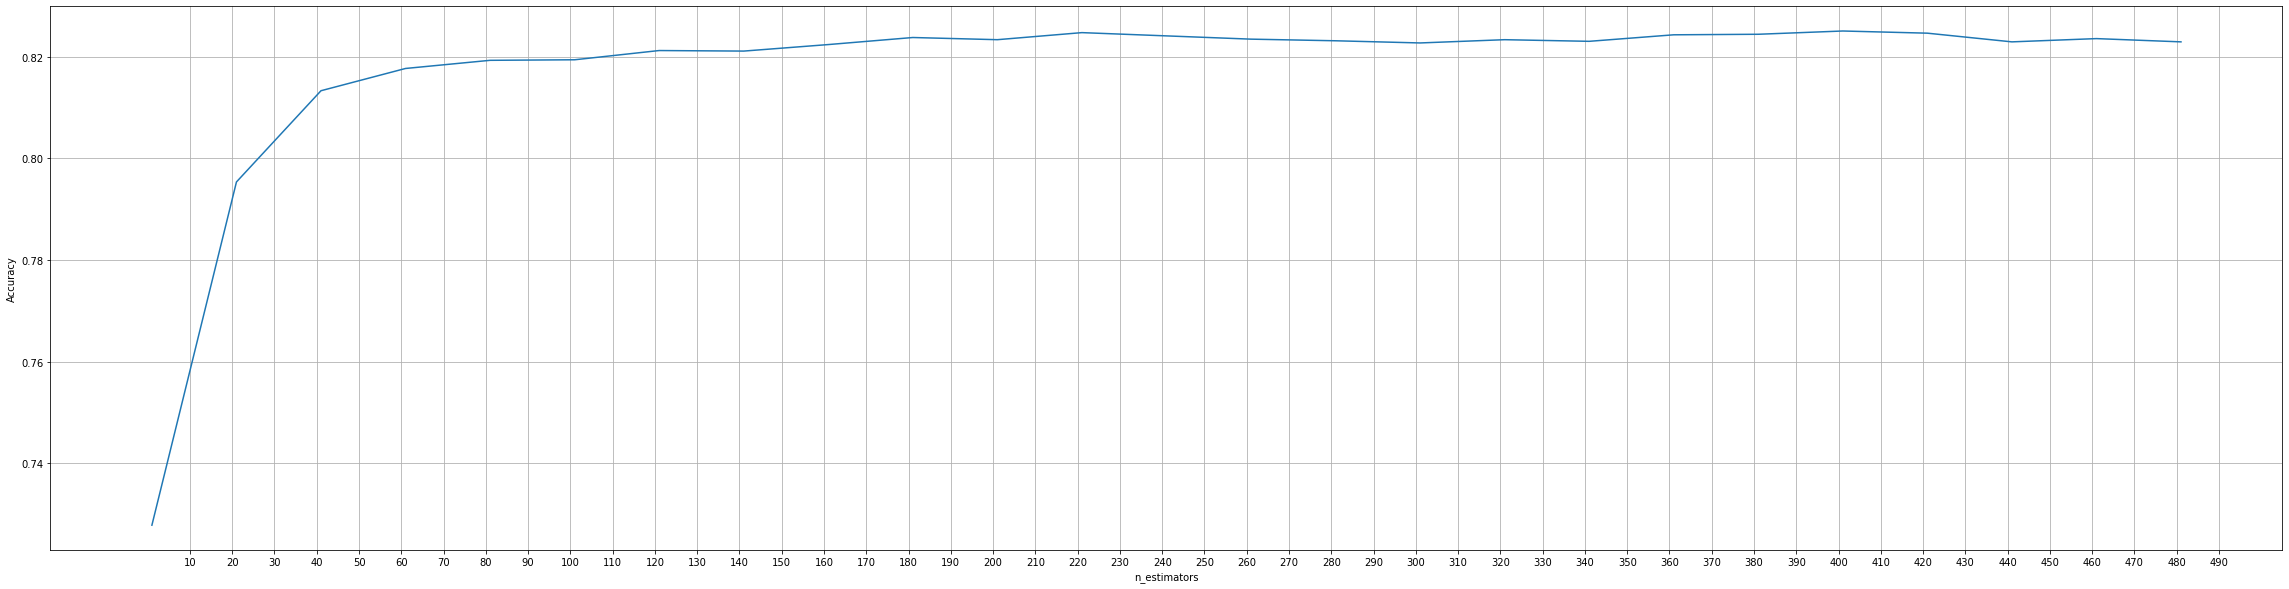

In [45]:
plt.figure(figsize=(40,10))
sns.lineplot(x=n_range_ada,y=n_scores_ada)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(10,500,10))
plt.grid()

### The peak is at n = 220 , so we will make grid search from 190 to 250

In [47]:
ada_params={
    "n_estimators":range(190,250,5)
}
adac=AdaBoostClassifier()
grid_search_ada=GridSearchCV(estimator=adac,param_grid=ada_params,cv=10,scoring='accuracy')
grid_result_ada=grid_search_ada.fit(X_train,y_train)

In [48]:
print(grid_result_ada.best_params_)

{'n_estimators': 225}


In [49]:
ada_best=AdaBoostClassifier(n_estimators=grid_result_ada.best_params_["n_estimators"])
scores_best_ada=cross_val_score(ada_best,X_train,y_train,cv=10,scoring='accuracy')
print("Mean accuracy for n= "+str(grid_result_ada.best_params_["n_estimators"])+" equals "+str(scores_best_ada.mean()))

Mean accuracy for n= 225 equals 0.8251450346167528


In [51]:
final_ada=AdaBoostClassifier(n_estimators=grid_result_ada.best_params_["n_estimators"])
final_ada.fit(X_train,y_train)
y_pred_ada=final_ada.predict(X_test)
print("AdaBoost classification report\n=============================")
print(classification_report(y_test,y_pred_ada))
cm_adac=confusion_matrix(y_test,y_pred_ada)
print(grid_result_ada.best_params_)

AdaBoost classification report
              precision    recall  f1-score   support

           g       0.81      0.83      0.82      2007
           h       0.83      0.81      0.82      2007

    accuracy                           0.82      4014
   macro avg       0.82      0.82      0.82      4014
weighted avg       0.82      0.82      0.82      4014

{'n_estimators': 225}


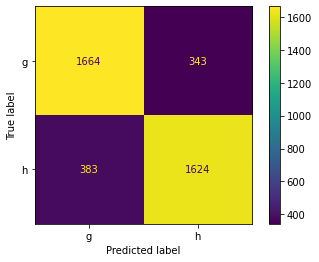

In [52]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_adac,display_labels=final_ada.classes_)
disp.plot()

In [53]:
cm_adac=confusion_matrix(y_test,y_pred_ada)
cm_adac=cm_adac.tolist()

In [54]:
cm_adac

[[1664, 343], [383, 1624]]

In [55]:
ada_sens , ada_spec = sens_and_spec(cm_adac[0][0],cm_adac[1][1],cm_adac[0][1],cm_adac[1][0])
print("AdaBoost sensitivity is "+str(ada_sens))
print("AdaBoost speceficity is "+str(ada_spec))

AdaBoost sensitivity is 0.8290981564524166
AdaBoost speceficity is 0.8091679123069258


## Naive Bayes

In [56]:
gnb=GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb=gnb.predict(X_test)

In [57]:
print("Naive Bayes classification report\n================================")
print(classification_report(y_test,y_pred_nb))
cm_nb=confusion_matrix(y_test,y_pred_nb)

Naive Bayes classification report
              precision    recall  f1-score   support

           g       0.61      0.91      0.73      2007
           h       0.82      0.42      0.56      2007

    accuracy                           0.67      4014
   macro avg       0.72      0.67      0.64      4014
weighted avg       0.72      0.67      0.64      4014



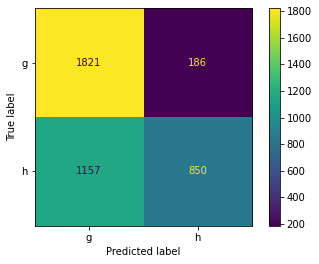

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb,display_labels=gnb.classes_)
disp.plot()

In [59]:
cm_nb=confusion_matrix(y_test,y_pred_nb)
cm_nb=cm_nb.tolist()

In [60]:
cm_nb

[[1821, 186], [1157, 850]]

In [61]:
nb_sens , nb_spec = sens_and_spec(cm_nb[0][0],cm_nb[1][1],cm_nb[0][1],cm_nb[1][0])
print("Naive Bayes sensitivity is "+str(nb_sens))
print("Naive Bayes speceficity is "+str(nb_spec))

Naive Bayes sensitivity is 0.9073243647234679
Naive Bayes speceficity is 0.4235176880916791


## Descision Tree

### 1- Entropy

In [62]:
dtc_entropy=DecisionTreeClassifier(criterion="entropy",random_state=42)
dtc_entropy.fit(X_train,y_train)
y_pred_entropy=dtc_entropy.predict(X_test)

In [63]:
print("Entropy classification report\n====================================")
print(classification_report(y_test,y_pred_entropy))
cm_entr=confusion_matrix(y_test,y_pred_entropy)

Entropy classification report
              precision    recall  f1-score   support

           g       0.80      0.80      0.80      2007
           h       0.80      0.79      0.80      2007

    accuracy                           0.80      4014
   macro avg       0.80      0.80      0.80      4014
weighted avg       0.80      0.80      0.80      4014



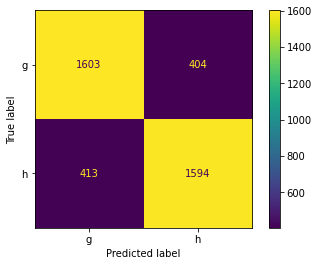

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_entr,display_labels=dtc_entropy.classes_)
disp.plot()

In [65]:
cm_entr=confusion_matrix(y_test,y_pred_entropy)
cm_entr=cm_entr.tolist()

In [66]:
cm_entr

[[1603, 404], [413, 1594]]

In [67]:
entr_sens , entr_spec = sens_and_spec(cm_entr[0][0],cm_entr[1][1],cm_entr[0][1],cm_entr[1][0])
print("DT with entropy sensitivity is "+str(entr_sens))
print("DT with entropy speceficity is "+str(entr_spec))

DT with entropy sensitivity is 0.7987045341305431
DT with entropy speceficity is 0.7942202291978077


### 2- Gini

In [68]:
dtc_gini=DecisionTreeClassifier(criterion="gini",random_state=42)
dtc_gini.fit(X_train,y_train)
y_pred_gini=dtc_gini.predict(X_test)

In [69]:
print("Gini classification report\n====================================")
print(classification_report(y_test,y_pred_gini))
cm_gini=confusion_matrix(y_test,y_pred_gini)

Gini classification report
              precision    recall  f1-score   support

           g       0.79      0.81      0.80      2007
           h       0.80      0.78      0.79      2007

    accuracy                           0.80      4014
   macro avg       0.80      0.80      0.80      4014
weighted avg       0.80      0.80      0.80      4014



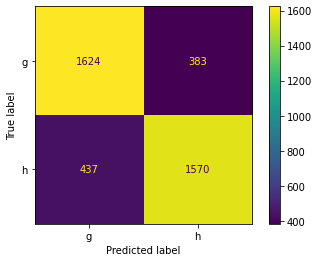

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gini,display_labels=dtc_gini.classes_)
disp.plot()

In [71]:
cm_gini=confusion_matrix(y_test,y_pred_gini)
cm_gini=cm_gini.tolist()

In [73]:
cm_gini

[[1624, 383], [437, 1570]]

In [74]:
gini_sens , gini_spec = sens_and_spec(cm_gini[0][0],cm_gini[1][1],cm_gini[0][1],cm_gini[1][0])
print("DT with gini sensitivity is "+str(gini_sens))
print("DT with gini speceficity is "+str(gini_spec))

DT with gini sensitivity is 0.8091679123069258
DT with gini speceficity is 0.7822620827105132


## After finishing all algorithms and after reading the data describtion , the target in data is to minimize false positive events.
## When we want to minimize FP , we should choose algorithms with higher specificity , so according to this metric using random forest will be the best classifier.
## Also percision metric is more important when we want to minimize FP , so also random forest will be the best classifier

## Using Pytorch

In [75]:
data_nn=data.copy()

In [76]:
data_nn['class'] = [1 if each == "g" else 0 for each in data_nn['class']]

In [77]:
data_nn

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,1
...,...,...,...,...,...,...,...,...,...,...,...
13371,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
13372,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
13373,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
13374,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [78]:
X_nn = data_nn.drop(columns = ['class']).copy()
y_nn = data_nn['class']

In [79]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size = 0.3, random_state = 42,stratify=y_nn)

In [80]:
train_data=pd.concat([pd.DataFrame(X_train_nn),pd.DataFrame(y_train_nn)],axis=1)
test_data=pd.concat([pd.DataFrame(X_test_nn),pd.DataFrame(y_test_nn)],axis=1)

In [81]:
train_data['class'].value_counts()

1    4682
0    4681
Name: class, dtype: int64

In [82]:
test_data['class'].value_counts()

0    2007
1    2006
Name: class, dtype: int64

In [84]:
temp = train_data[train_data['class'] == 1]
rows = np.random.choice(temp.index.values, 1)
sampled_df = train_data.loc[rows]
sampled_df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
461,57.1095,19.0139,2.6527,0.2469,0.1301,-25.0464,44.8621,-11.3247,34.613,168.147,1


In [85]:
x=sampled_df.index.values[0]
x

461

In [86]:
train_data=train_data.drop(x)
train_data['class'].value_counts()

1    4681
0    4681
Name: class, dtype: int64

In [87]:
test_data=pd.concat([test_data,sampled_df],axis=0)
test_data['class'].value_counts()

0    2007
1    2007
Name: class, dtype: int64

In [88]:
train_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
5291,32.0020,22.0948,2.6149,0.2718,0.1566,-19.6795,-25.2602,-10.9333,19.5760,157.8390,1
6065,12.6834,11.6968,2.1351,0.6960,0.3919,15.7979,-9.6666,0.5806,53.0220,112.6560,1
3991,75.5326,29.0068,3.2583,0.3608,0.2232,34.4086,-47.6490,21.1596,2.4050,365.0450,1
12093,18.0358,8.7369,2.4388,0.5838,0.2898,-23.9383,-8.4160,-5.6080,83.4883,162.4455,0
3940,19.4624,12.5574,2.3738,0.4989,0.2981,1.2733,-8.3848,-10.1565,15.0010,140.9150,1
...,...,...,...,...,...,...,...,...,...,...,...
7956,21.2450,12.6979,2.5443,0.5535,0.2768,0.1920,24.5095,-8.6167,64.1640,215.0051,0
12270,78.6741,48.7446,3.2160,0.1088,0.0569,18.5380,18.8247,-38.5338,1.7904,138.3050,0
5485,27.0280,10.1215,2.4433,0.5081,0.2649,38.4014,-16.4370,6.4502,65.9551,56.2666,1
4391,41.1210,20.2472,2.7889,0.2569,0.1439,9.0304,-22.6301,-11.6170,6.0005,233.6900,1


In [89]:
test_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
7442,99.1099,39.7409,3.8987,0.0934,0.0652,-117.5310,-44.9747,28.6933,42.8955,233.9286,0
13086,52.4120,11.8978,3.1020,0.2183,0.1087,44.0730,32.7187,-6.6120,36.3549,140.0659,0
5670,62.0774,34.8600,3.8463,0.1375,0.0713,45.4124,50.7490,-20.3151,3.6350,198.9220,1
3908,102.5020,41.1610,4.1093,0.0975,0.0503,58.8221,89.5152,-27.2893,2.8400,268.6130,1
1982,24.3834,10.0560,2.3233,0.5131,0.2874,14.5388,-15.1356,-5.1963,35.9130,58.9320,1
...,...,...,...,...,...,...,...,...,...,...,...
1099,42.6868,19.2865,3.0710,0.2607,0.1380,17.4673,41.7046,10.7413,4.8021,234.3370,1
1023,26.6190,18.0992,2.5933,0.3546,0.1926,-5.3782,14.4070,10.3654,8.3473,152.8290,1
6365,27.6904,15.0452,2.6395,0.3647,0.2099,15.8284,9.4247,8.6228,28.9887,177.8650,1
7078,41.5880,17.8972,2.5185,0.3121,0.1561,19.1734,33.8760,13.6871,35.1370,110.5590,0


In [90]:
X_train_nn = train_data.drop(columns = ['class']).copy()
y_train_nn = train_data['class']
X_test_nn = test_data.drop(columns = ['class']).copy()
y_test_nn = test_data['class']

## Used only once

In [91]:
train_data_copy=train_data.reset_index(drop=True)

In [92]:
sk=StratifiedKFold(n_splits=5)
target=train_data_copy.loc[:,'class']
fold_no = 1
for train_index, val_index in sk.split(train_data_copy, target):
    train = train_data_copy.loc[train_index,:]
    val = train_data_copy.loc[val_index,:]
    train.to_csv('train_fold_' + str(fold_no) + '.csv',index=False)
    val.to_csv('val_fold_' + str(fold_no) + '.csv',index=False)
    fold_no += 1

## Continue

In [93]:
class Gamma_nn(nn.Module):
    def __init__(self,h1_size,h2_size):
        super(Gamma_nn,self).__init__()
        self.hidden1=nn.Linear(10,h1_size)
        self.relu1=nn.ReLU()
        self.hidden2=nn.Linear(h1_size,h2_size)
        self.relu2=nn.ReLU()
        self.output=nn.Linear(h2_size,1)
        #self.sigmoid=nn.Sigmoid()
    def forward(self,x):
        out=self.hidden1(x)
        out=self.relu1(out)
        out=self.hidden2(out)
        out=self.relu2(out)
        out=self.output(out)
        #out=self.sigmoid(out)
        return out

In [94]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [95]:
## train data
class TrainData(torch.utils.data.Dataset):  
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data      
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]       
    def __len__ (self):
        return len(self.X_data)
class TestData(torch.utils.data.Dataset):
    def __init__(self, X_data):
        self.X_data = X_data     
    def __getitem__(self, index):
        return self.X_data[index]       
    def __len__ (self):
        return len(self.X_data)

In [96]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    return acc

In [97]:
def train_model(model,optimizer,train_loader,no_epochs,print_epochs):
    model.train()
    for e in range(1, no_epochs+1):
        epoch_loss = 0
        epoch_acc = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()

            y_pred_nn = model(X_batch)

            loss = criterion(y_pred_nn, y_batch.unsqueeze(1))
            acc = binary_acc(y_pred_nn, y_batch.unsqueeze(1))

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        if print_epochs ==0:
          pass
        else:
          print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')
    return model

In [98]:
def evaluate_model(model,test_loader,y_test):
    y_pred_list = []
    model.eval()
    with torch.no_grad():
        for X_batch in test_loader:
            X_batch = X_batch.to(device)
            y_test_pred = model(X_batch)
            y_test_pred = torch.sigmoid(y_test_pred)
            y_pred_tag = torch.round(y_test_pred)
            y_pred_list.append(y_pred_tag.cpu().numpy())

    y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
    acc=accuracy_score(y_test,y_pred_list)
    return acc , y_pred_list

In [99]:
def train_val(val_num):
    val_data=pd.read_csv('/content/sample_data/val_fold_'+str(val_num)+'.csv')
    train_data=pd.read_csv('/content/sample_data/train_fold_'+str(val_num)+'.csv')
    return train_data,val_data

In [100]:
h1_range=range(10,101,10)
h2_range=range(10,101,10)
accuracies=[]
for i in h1_range:
    row=[]
    for j in h2_range:
        accs=[]
        if (j-i<=30 and j>=i) or (j-i>=-30 and j<=i):
          for k in range(1,6):
              train_data_tune,val_data_tune=train_val(k)
              X_train_tune = train_data_tune.drop(columns = ['class']).copy()
              y_train_tune = train_data_tune['class']
              X_val_tune = val_data_tune.drop(columns = ['class']).copy()
              y_val_tune = val_data_tune['class']
              scaler = StandardScaler()
              X_train_tune = scaler.fit_transform(X_train_tune)
              X_val_tune = scaler.transform(X_val_tune)
              train_data_tune = TrainData(torch.FloatTensor(X_train_tune),torch.FloatTensor(y_train_tune))
              val_data_tune = TestData(torch.FloatTensor(X_val_tune))
              train_loader_tune = DataLoader(dataset=train_data_tune, batch_size=512)
              val_loader_tune = DataLoader(dataset=val_data_tune, batch_size=1)
              model = Gamma_nn(i,j).to(device)
              criterion = nn.BCEWithLogitsLoss()
              optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
              model=train_model(model,optimizer,train_loader_tune,100,0)
              acc,ypl=evaluate_model(model,val_loader_tune,y_val_tune.values.tolist())
              accs.append(acc)
          mean_acc=mean(accs)
          row.append(mean_acc)
          print("Mean accuracy at "+str(i)+" "+str(j)+" = "+str(mean_acc))
        else:
          row.append(0)
          print("Mean accuracy at "+str(i)+" "+str(j)+" = 0")
    accuracies.append(row)


Mean accuracy at 10 10 = 0.8377489264902506
Mean accuracy at 10 20 = 0.8387102938290872
Mean accuracy at 10 30 = 0.8384977023925235
Mean accuracy at 10 40 = 0.8396717182088245
Mean accuracy at 10 50 = 0
Mean accuracy at 10 60 = 0
Mean accuracy at 10 70 = 0
Mean accuracy at 10 80 = 0
Mean accuracy at 10 90 = 0
Mean accuracy at 10 100 = 0
Mean accuracy at 20 10 = 0.8466147936716544
Mean accuracy at 20 20 = 0.8467214601557901
Mean accuracy at 20 30 = 0.8453332557577085
Mean accuracy at 20 40 = 0.8490722297516211
Mean accuracy at 20 50 = 0.8458667593010892
Mean accuracy at 20 60 = 0
Mean accuracy at 20 70 = 0
Mean accuracy at 20 80 = 0
Mean accuracy at 20 90 = 0
Mean accuracy at 20 100 = 0
Mean accuracy at 30 10 = 0.8466156492851634
Mean accuracy at 30 20 = 0.8487511465221022
Mean accuracy at 30 30 = 0.8516347351705067
Mean accuracy at 30 40 = 0.8500325133133462
Mean accuracy at 30 50 = 0.8505667013475342
Mean accuracy at 30 60 = 0.8521685239183905
Mean accuracy at 30 70 = 0
Mean accuracy 

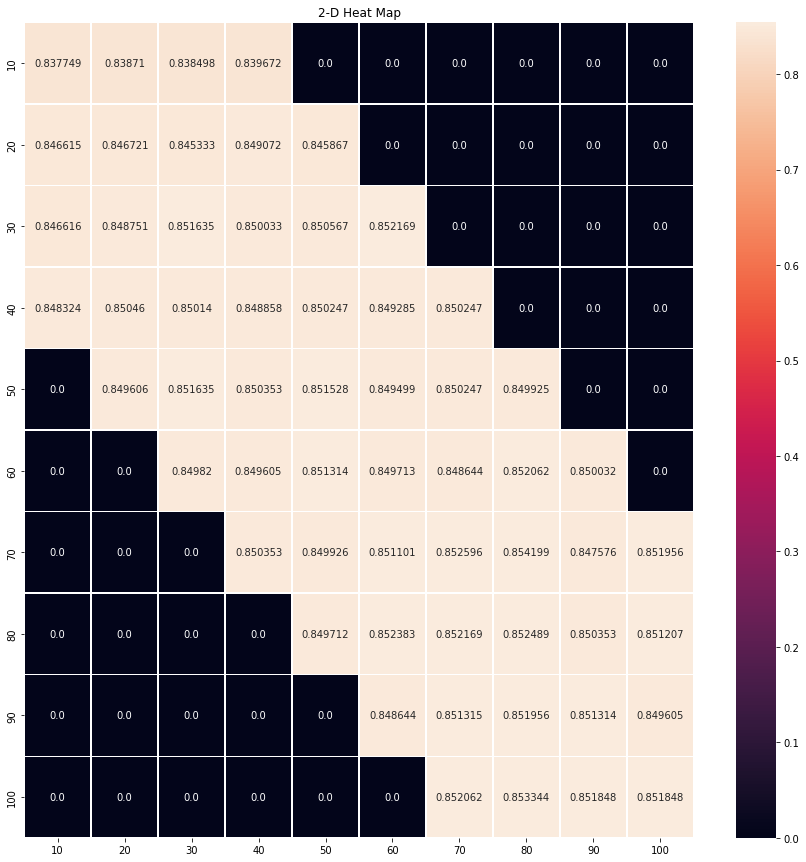

In [101]:
arr_heat=np.array(accuracies)
ticks=[10,20,30,40,50,60,70,80,90,100]
plt.figure(figsize=(15,15))
ax = sns.heatmap( arr_heat ,annot=True,fmt=".6", linewidth = 0.5,xticklabels=ticks,yticklabels=ticks)
plt.title( "2-D Heat Map" )
plt.show()

## From the heatmap , it is shown that 70 , 80 combinations gives heighest accuracy

In [102]:
train_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
5291,32.0020,22.0948,2.6149,0.2718,0.1566,-19.6795,-25.2602,-10.9333,19.5760,157.8390,1
6065,12.6834,11.6968,2.1351,0.6960,0.3919,15.7979,-9.6666,0.5806,53.0220,112.6560,1
3991,75.5326,29.0068,3.2583,0.3608,0.2232,34.4086,-47.6490,21.1596,2.4050,365.0450,1
12093,18.0358,8.7369,2.4388,0.5838,0.2898,-23.9383,-8.4160,-5.6080,83.4883,162.4455,0
3940,19.4624,12.5574,2.3738,0.4989,0.2981,1.2733,-8.3848,-10.1565,15.0010,140.9150,1
...,...,...,...,...,...,...,...,...,...,...,...
7956,21.2450,12.6979,2.5443,0.5535,0.2768,0.1920,24.5095,-8.6167,64.1640,215.0051,0
12270,78.6741,48.7446,3.2160,0.1088,0.0569,18.5380,18.8247,-38.5338,1.7904,138.3050,0
5485,27.0280,10.1215,2.4433,0.5081,0.2649,38.4014,-16.4370,6.4502,65.9551,56.2666,1
4391,41.1210,20.2472,2.7889,0.2569,0.1439,9.0304,-22.6301,-11.6170,6.0005,233.6900,1


In [103]:
test_data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
7442,99.1099,39.7409,3.8987,0.0934,0.0652,-117.5310,-44.9747,28.6933,42.8955,233.9286,0
13086,52.4120,11.8978,3.1020,0.2183,0.1087,44.0730,32.7187,-6.6120,36.3549,140.0659,0
5670,62.0774,34.8600,3.8463,0.1375,0.0713,45.4124,50.7490,-20.3151,3.6350,198.9220,1
3908,102.5020,41.1610,4.1093,0.0975,0.0503,58.8221,89.5152,-27.2893,2.8400,268.6130,1
1982,24.3834,10.0560,2.3233,0.5131,0.2874,14.5388,-15.1356,-5.1963,35.9130,58.9320,1
...,...,...,...,...,...,...,...,...,...,...,...
1099,42.6868,19.2865,3.0710,0.2607,0.1380,17.4673,41.7046,10.7413,4.8021,234.3370,1
1023,26.6190,18.0992,2.5933,0.3546,0.1926,-5.3782,14.4070,10.3654,8.3473,152.8290,1
6365,27.6904,15.0452,2.6395,0.3647,0.2099,15.8284,9.4247,8.6228,28.9887,177.8650,1
7078,41.5880,17.8972,2.5185,0.3121,0.1561,19.1734,33.8760,13.6871,35.1370,110.5590,0


In [104]:
X_train_nn = train_data.drop(columns = ['class']).copy()
y_train_nn = train_data['class']
X_test_nn = test_data.drop(columns = ['class']).copy()
y_test_nn = test_data['class']

## Final Model

In [105]:
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)

In [106]:
train_data = TrainData(torch.FloatTensor(X_train_nn),torch.FloatTensor(y_train_nn))
test_data = TestData(torch.FloatTensor(X_test_nn))

In [107]:
train_loader = DataLoader(dataset=train_data, batch_size=512)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [108]:
model = Gamma_nn(70,80).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [109]:
model=train_model(model,optimizer,train_loader,100,1)

Epoch 001: | Loss: 0.66231 | Acc: 68.526
Epoch 002: | Loss: 0.57375 | Acc: 76.474
Epoch 003: | Loss: 0.49019 | Acc: 77.895
Epoch 004: | Loss: 0.44695 | Acc: 78.895
Epoch 005: | Loss: 0.42259 | Acc: 80.158
Epoch 006: | Loss: 0.40719 | Acc: 81.053
Epoch 007: | Loss: 0.39655 | Acc: 82.000
Epoch 008: | Loss: 0.38851 | Acc: 82.737
Epoch 009: | Loss: 0.38199 | Acc: 83.211
Epoch 010: | Loss: 0.37646 | Acc: 83.526
Epoch 011: | Loss: 0.37169 | Acc: 83.737
Epoch 012: | Loss: 0.36745 | Acc: 83.947
Epoch 013: | Loss: 0.36366 | Acc: 83.947
Epoch 014: | Loss: 0.36023 | Acc: 84.211
Epoch 015: | Loss: 0.35719 | Acc: 84.421
Epoch 016: | Loss: 0.35443 | Acc: 84.526
Epoch 017: | Loss: 0.35201 | Acc: 84.632
Epoch 018: | Loss: 0.34982 | Acc: 84.789
Epoch 019: | Loss: 0.34784 | Acc: 84.842
Epoch 020: | Loss: 0.34598 | Acc: 85.105
Epoch 021: | Loss: 0.34426 | Acc: 84.947
Epoch 022: | Loss: 0.34268 | Acc: 85.105
Epoch 023: | Loss: 0.34125 | Acc: 85.158
Epoch 024: | Loss: 0.33991 | Acc: 85.105
Epoch 025: | Los

In [110]:
final_acc , final_y_pred = evaluate_model(model,test_loader,y_test_nn.values.tolist())

In [111]:
print("Neural network accuracy is "+str(final_acc))

Neural network accuracy is 0.8500249128051819


In [112]:
cm_nn=confusion_matrix(y_test_nn,final_y_pred)

In [113]:
print(classification_report(y_test_nn,final_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2007
           1       0.82      0.90      0.86      2007

    accuracy                           0.85      4014
   macro avg       0.85      0.85      0.85      4014
weighted avg       0.85      0.85      0.85      4014



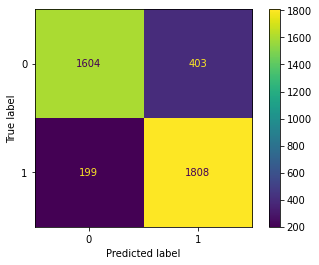

In [115]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn)
disp.plot()

In [117]:
nn_sens , nn_spec = sens_and_spec(cm_nn[1][1],cm_nn[0][0],cm_nn[1][0],cm_nn[0][1])
print("NN sensitivity is "+str(nn_sens))
print("NN speceficity is "+str(nn_spec))

NN sensitivity is 0.9008470353761834
NN speceficity is 0.7992027902341804


## Neural network has better accuracy compared to our models , also specificity sounds good as it is important in our case